In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# 2-opt algo
import numpy as np
import random 

cities = np.array([
  [0.0, 131.5], [755.6, 458.7], [532.8, 219.0], [47.0, 678.9], [679.3, 934.7], [383.5, 519.4], [831.0, 34.6], [53.5, 529.7], [671.1, 7.7], [383.4, 66.8], 
  [417.5, 686.8], [589.0, 930.4], [846.2, 526.9], [92.0, 653.9], [416.0, 701.2], [910.3, 762.2], [262.5, 47.5], [736.1, 328.2], [632.6, 756.4], [991.0, 365.3], 
  [247.0, 982.6], [722.7, 753.4], [651.5, 72.7], [631.6, 884.7], [272.7, 436.4], [766.5, 477.7], [237.8, 274.9], [359.3, 166.5], [486.5, 897.7], [909.2, 60.6], 
  [904.7, 504.5], [516.3, 319.0], [986.6, 494.0], [266.1, 90.7], [947.8, 73.7], [500.7, 384.1], [277.1, 913.8], [529.7, 464.4], [941.0, 50.1], [761.5, 770.2], 
  [827.8, 125.4], [15.9, 688.5], [868.2, 629.5], [736.2, 725.4], [999.5, 888.6], [233.2, 306.3], [351.0, 513.3], [591.1, 846.0], [412.1, 841.5], [269.3, 415.4], 
  [537.3, 467.9], [287.2, 178.3], [153.7, 571.7], [802.4, 33.1], [534.4, 498.5], [955.4, 748.3], [554.6, 890.7], [624.8, 842.0], [159.8, 212.8], [714.7, 130.4], 
  [91.0, 274.6], [3.0, 414.3], [26.9, 709.8], [937.9, 239.9], [180.9, 317.5], [887.0, 652.1], [150.3, 681.3], [385.8, 387.7], [499.7, 147.5], [587.2, 845.6], 
  [590.1, 955.4], [556.1, 148.2], [983.3, 408.8], [141.8, 564.9], [252.1, 488.5], [464.0, 961.1], [126.0, 199.8], [319.2, 629.3], [126.7, 651.3], [621.6, 803.1], 
  [247.8, 476.4], [389.3, 203.3], [28.4, 901.7], [426.5, 142.0], [947.5, 410.3], [131.2, 885.6], [92.2, 162.2], [71.1, 365.3], [253.1, 135.1], [783.2, 455.3], 
  [349.5, 452.3], [808.9, 931.7], [651.6, 215.2], [679.6, 908.9], [250.1, 860.9], [471.3, 506.0], [600.4, 817.6], [755.8, 462.2], [951.4, 632.7], [439.3, 824.7]
])

num_cities = len(cities)
tour = list(range(num_cities))
random.shuffle(tour)
tour.append(tour[0])  # Close the loop

In [4]:
def distance(i,j):
    dis = np.linalg.norm(cities[i]-cities[j])
    return dis

#now we have to find out the total tour distance

def tour_len(tour):
    dist = 0
    for i in range(1,len(tour)-1):
        dist += distance(tour[i-1], tour[i])
    return dist

In [5]:
len_tour = tour_len(tour)
tour = list(map(int, tour))  # Ensures each item is an integer

def op2(tour):
    best_tou = tour
    best_dis = tour_len(tour)
    improved = True
    while improved:
        improved = False
        for i in range(1, len(best_tou)-2):
            for j in range(i+1, len(best_tou)-1):
                if j - i == 1:
                    continue
                new_tou = best_tou[:i] + best_tou[i:j][::-1] + best_tou[j:]
                if tour_len(new_tou) < tour_len(best_tou):
                    best_tou = new_tou
                    best_tou = list(map(int, best_tou))
                    best_dis = tour_len(new_tou)
                    improved = True
        tour = best_tou
                
    return list(map(int, best_tou))

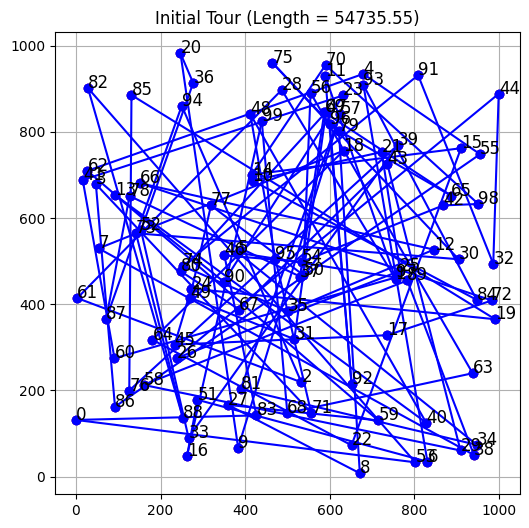

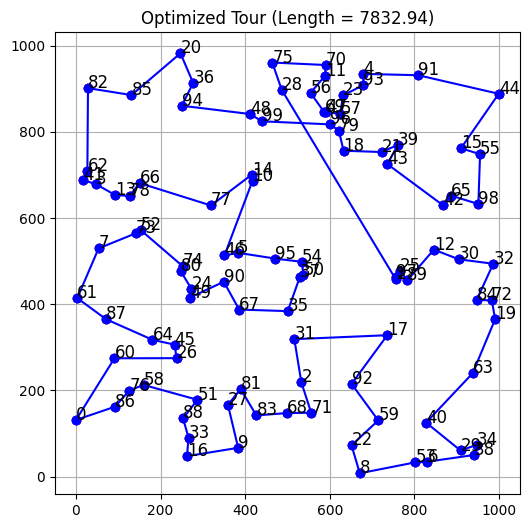

Initial Tour Length: 54735.55
Optimized Tour Length: 7832.94


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Plot a tour
def plot_tour(tour, title):
    plt.figure(figsize=(6, 6))
    for i in range(len(tour) - 1):
        a, b = int(tour[i]), int(tour[i+1])  #  Ensure integers
        plt.plot([cities[a][0], cities[b][0]], [cities[a][1], cities[b][1]], 'bo-')
    plt.scatter(cities[:, 0], cities[:, 1], c='red')
    for i, (x, y) in enumerate(cities):
        plt.text(x + 0.1, y + 0.1, str(i), fontsize=12)
    plt.title(title)
    plt.grid(True)
    plt.show()


# Run and visualize
initial_length = tour_len(tour)
plot_tour(tour, f"Initial Tour (Length = {initial_length:.2f})")

optimized_tour = op2(tour)
optimized_length = tour_len(optimized_tour)
plot_tour(optimized_tour, f"Optimized Tour (Length = {optimized_length:.2f})")

print(f"Initial Tour Length: {initial_length:.2f}")
print(f"Optimized Tour Length: {optimized_length:.2f}")